# The Fundamental Group: An Introduction to Algebraic Topology

## 1. Theoretical Foundation

The **fundamental group** is one of the most important invariants in algebraic topology. It captures essential information about the "holes" in a topological space by studying loops and their equivalence classes under continuous deformation.

### 1.1 Paths and Loops

A **path** in a topological space $X$ is a continuous map $\gamma: [0,1] \to X$. We call $\gamma(0)$ the **initial point** and $\gamma(1)$ the **terminal point**.

A **loop** based at $x_0 \in X$ is a path $\gamma$ with $\gamma(0) = \gamma(1) = x_0$.

### 1.2 Homotopy of Paths

Two paths $\gamma_0, \gamma_1: [0,1] \to X$ with the same endpoints are **homotopic** (written $\gamma_0 \simeq \gamma_1$) if there exists a continuous map:

$$H: [0,1] \times [0,1] \to X$$

such that:
- $H(s, 0) = \gamma_0(s)$ for all $s \in [0,1]$
- $H(s, 1) = \gamma_1(s)$ for all $s \in [0,1]$
- $H(0, t) = \gamma_0(0) = \gamma_1(0)$ for all $t \in [0,1]$
- $H(1, t) = \gamma_0(1) = \gamma_1(1)$ for all $t \in [0,1]$

The map $H$ is called a **path homotopy** between $\gamma_0$ and $\gamma_1$.

### 1.3 The Fundamental Group $\pi_1(X, x_0)$

The **fundamental group** of $X$ based at $x_0$, denoted $\pi_1(X, x_0)$, is the set of homotopy equivalence classes of loops based at $x_0$:

$$\pi_1(X, x_0) = \{[\gamma] : \gamma \text{ is a loop based at } x_0\}$$

The group operation is **path concatenation**. For loops $\alpha$ and $\beta$, the product $\alpha \cdot \beta$ is defined as:

$$(\alpha \cdot \beta)(s) = \begin{cases} \alpha(2s) & \text{if } 0 \leq s \leq \frac{1}{2} \\ \beta(2s-1) & \text{if } \frac{1}{2} \leq s \leq 1 \end{cases}$$

### 1.4 Key Examples

| Space | Fundamental Group | Intuition |
|-------|-------------------|------------|
| $\mathbb{R}^n$ | $\{e\}$ (trivial) | All loops can be contracted |
| $S^1$ (circle) | $\mathbb{Z}$ | Loops counted by winding number |
| $S^2$ (sphere) | $\{e\}$ (trivial) | Any loop can be shrunk |
| Torus $T^2$ | $\mathbb{Z} \times \mathbb{Z}$ | Two independent generators |
| Figure-8 | $F_2$ (free group on 2 generators) | Non-abelian! |

### 1.5 The Winding Number

For the circle $S^1$, the fundamental group is isomorphic to $\mathbb{Z}$. The isomorphism is given by the **winding number**:

$$n = \frac{1}{2\pi} \oint_\gamma d\theta = \frac{1}{2\pi i} \oint_\gamma \frac{dz}{z}$$

This counts how many times a loop winds around the origin.

## 2. Computational Exploration

We will visualize concepts related to the fundamental group:
1. Loops on a torus with different homotopy classes
2. Winding numbers for loops in the plane minus a point
3. A homotopy between two paths

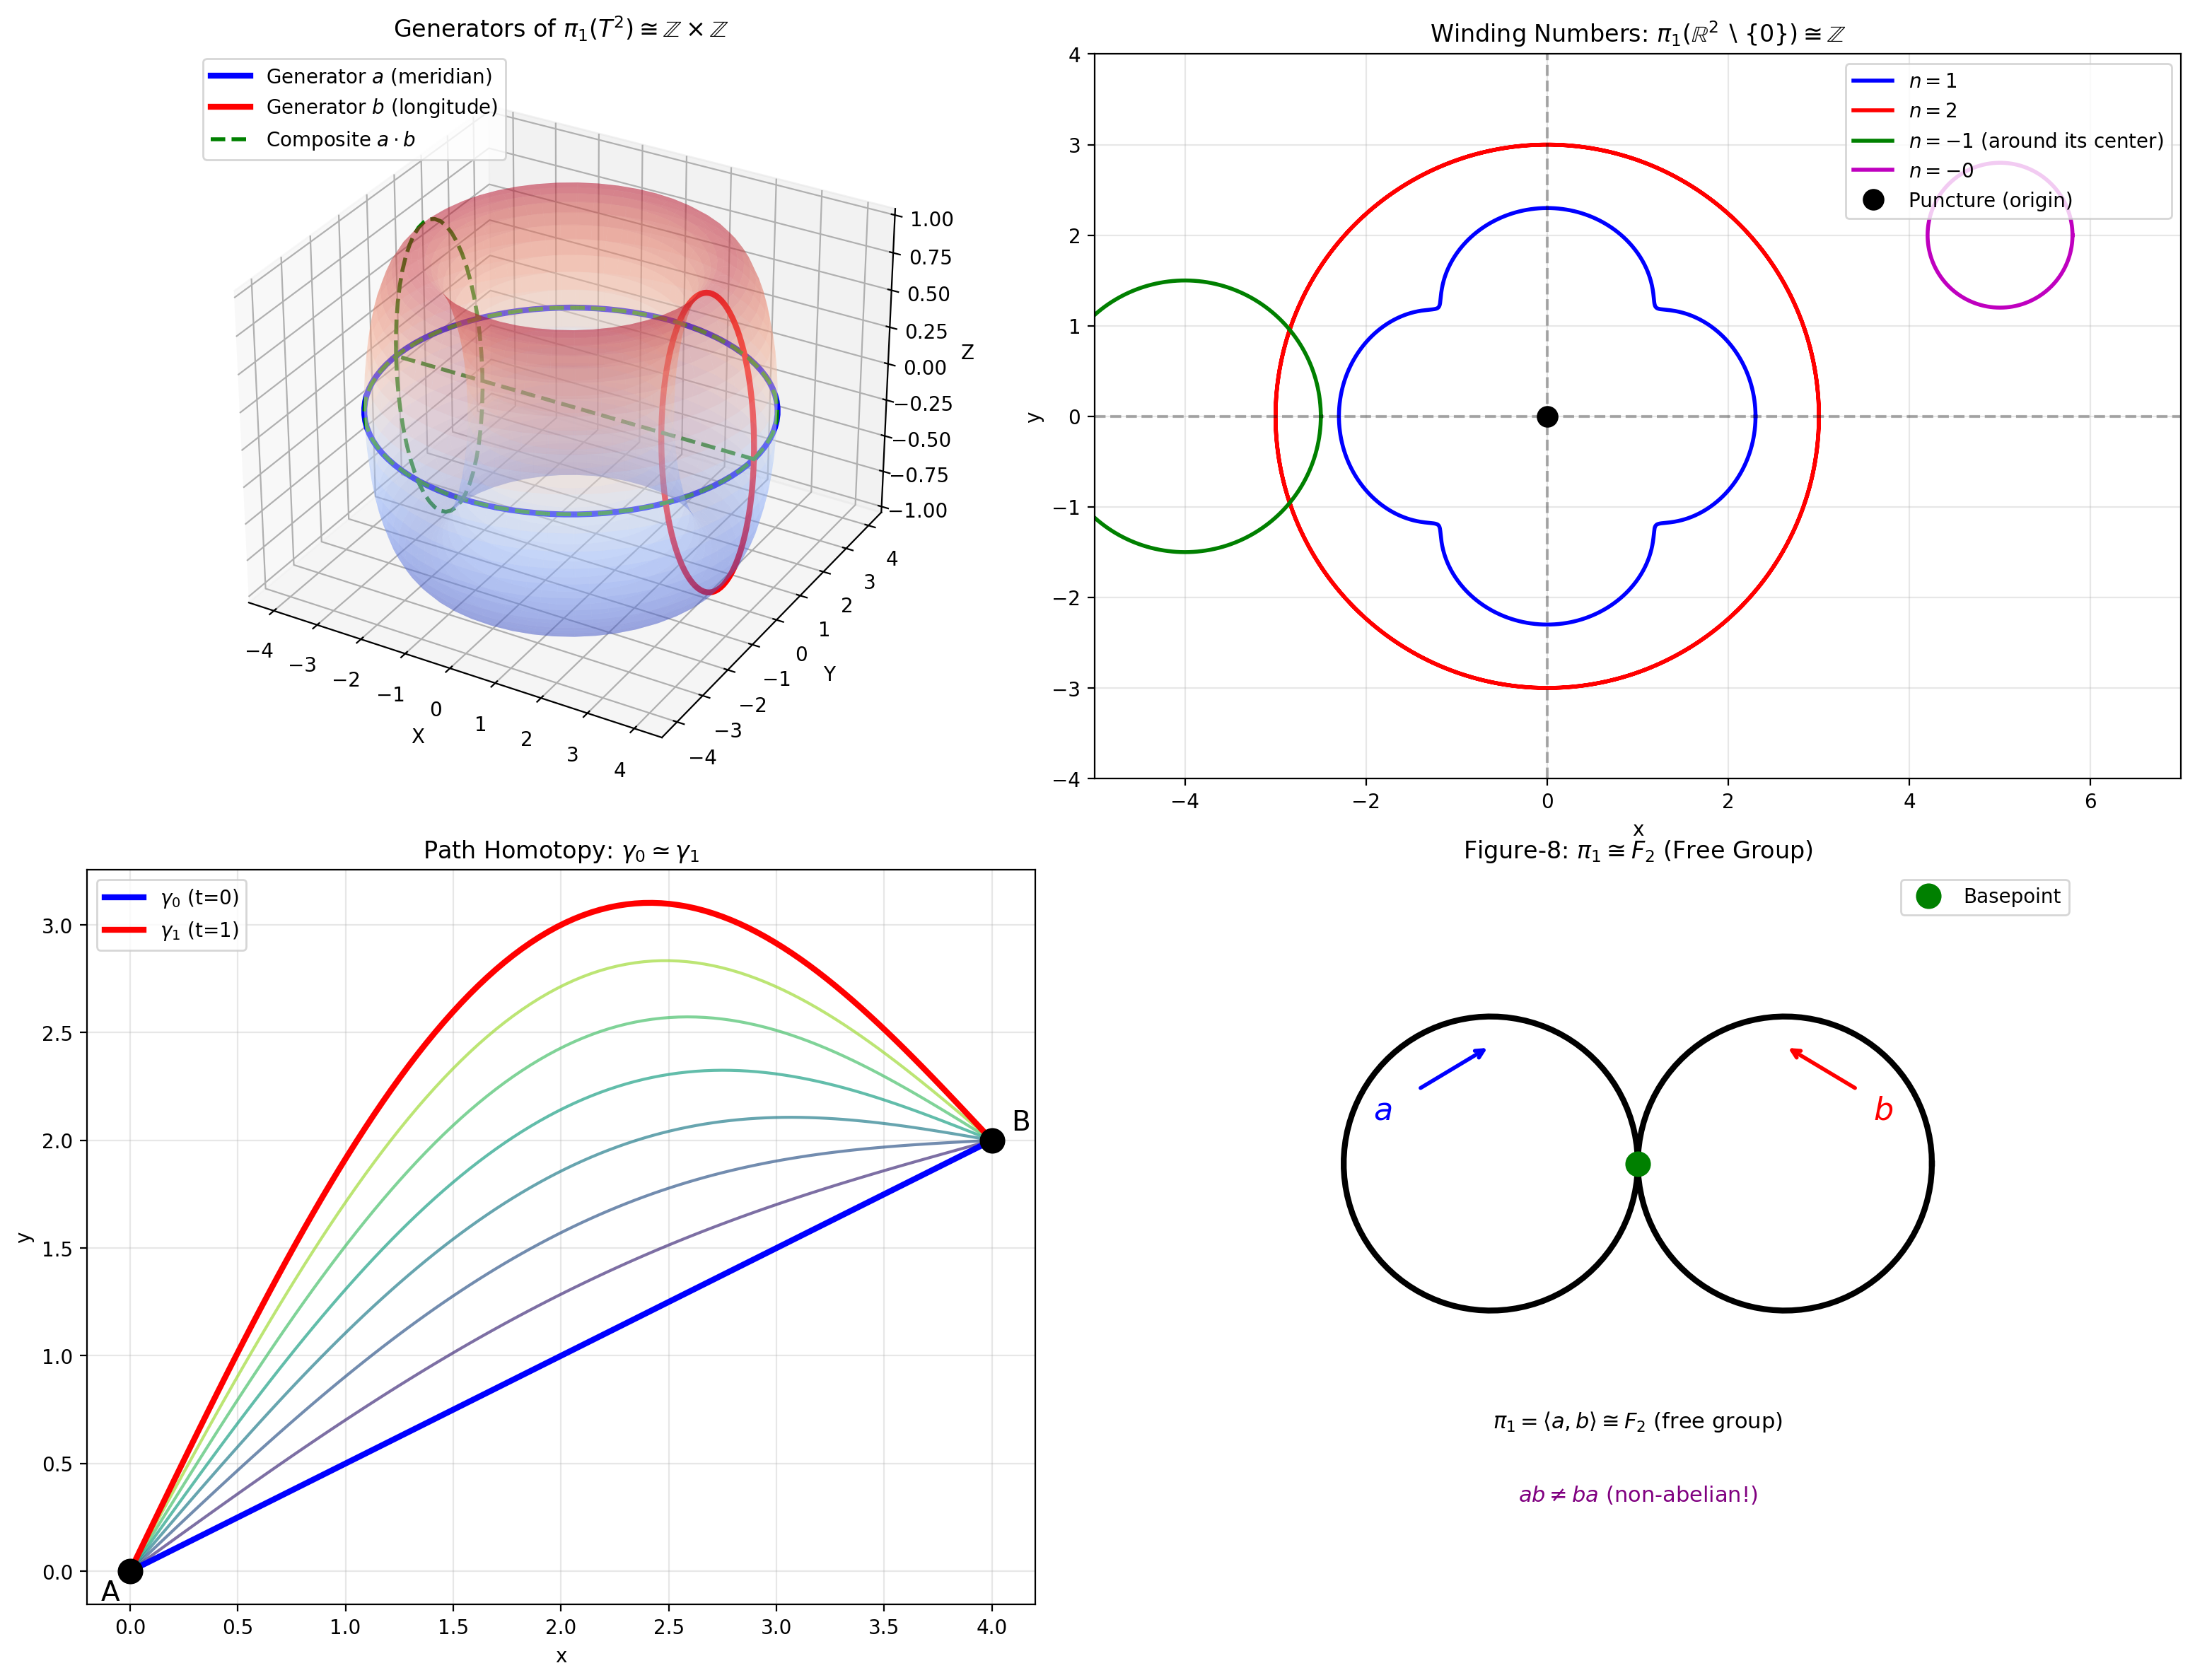

Plot saved to plot.png


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set up figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# ============================================================
# SUBPLOT 1: Loops on a Torus
# ============================================================
ax1 = fig.add_subplot(2, 2, 1, projection='3d')

# Torus parameters
R = 3  # Major radius
r = 1  # Minor radius

# Parametric surface of torus
u = np.linspace(0, 2*np.pi, 50)
v = np.linspace(0, 2*np.pi, 50)
U, V = np.meshgrid(u, v)

X_torus = (R + r*np.cos(V)) * np.cos(U)
Y_torus = (R + r*np.cos(V)) * np.sin(U)
Z_torus = r * np.sin(V)

# Plot the torus surface
ax1.plot_surface(X_torus, Y_torus, Z_torus, alpha=0.3, cmap=cm.coolwarm)

# Loop 1: Generator a (goes around the "hole" of the torus)
t = np.linspace(0, 2*np.pi, 100)
x_a = (R + r*np.cos(0)) * np.cos(t)
y_a = (R + r*np.cos(0)) * np.sin(t)
z_a = r * np.sin(0) * np.ones_like(t)
ax1.plot(x_a, y_a, z_a, 'b-', linewidth=3, label=r'Generator $a$ (meridian)')

# Loop 2: Generator b (goes around the "tube")
phi = 0  # Fixed angle around the hole
x_b = (R + r*np.cos(t)) * np.cos(phi)
y_b = (R + r*np.cos(t)) * np.sin(phi)
z_b = r * np.sin(t)
ax1.plot(x_b, y_b, z_b, 'r-', linewidth=3, label=r'Generator $b$ (longitude)')

# Loop 3: a*b (composite loop)
t_half = np.linspace(0, np.pi, 50)
# First half: go around a
x_ab1 = (R + r*np.cos(0)) * np.cos(2*t_half)
y_ab1 = (R + r*np.cos(0)) * np.sin(2*t_half)
z_ab1 = r * np.sin(0) * np.ones_like(t_half)
# Second half: go around b (starting from phi=pi)
x_ab2 = (R + r*np.cos(2*t_half)) * np.cos(np.pi)
y_ab2 = (R + r*np.cos(2*t_half)) * np.sin(np.pi)
z_ab2 = r * np.sin(2*t_half)
ax1.plot(np.concatenate([x_ab1, x_ab2]), np.concatenate([y_ab1, y_ab2]), 
         np.concatenate([z_ab1, z_ab2]), 'g--', linewidth=2, label=r'Composite $a \cdot b$')

ax1.set_title(r'Generators of $\pi_1(T^2) \cong \mathbb{Z} \times \mathbb{Z}$', fontsize=12)
ax1.legend(loc='upper left')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# ============================================================
# SUBPLOT 2: Winding Numbers
# ============================================================
ax2 = fig.add_subplot(2, 2, 2)

# Compute winding number for a parametric curve around origin
def compute_winding_number(x, y):
    """Compute the winding number of a closed curve around the origin."""
    # Use the discrete version of (1/2π) ∮ dθ
    theta = np.arctan2(y, x)
    dtheta = np.diff(theta)
    # Handle discontinuities at ±π
    dtheta = np.where(dtheta > np.pi, dtheta - 2*np.pi, dtheta)
    dtheta = np.where(dtheta < -np.pi, dtheta + 2*np.pi, dtheta)
    return np.sum(dtheta) / (2*np.pi)

# Create curves with different winding numbers
t = np.linspace(0, 2*np.pi, 1000)

# Winding number = 1
x1 = 2*np.cos(t) + 0.3*np.cos(5*t)
y1 = 2*np.sin(t) + 0.3*np.sin(5*t)
w1 = compute_winding_number(x1, y1)
ax2.plot(x1, y1, 'b-', linewidth=2, label=f'$n = {w1:.0f}$')

# Winding number = 2
x2 = 3*np.cos(2*t)
y2 = 3*np.sin(2*t)
w2 = compute_winding_number(x2, y2)
ax2.plot(x2, y2, 'r-', linewidth=2, label=f'$n = {w2:.0f}$')

# Winding number = -1 (clockwise)
x3 = 1.5*np.cos(-t) - 4
y3 = 1.5*np.sin(-t)
w3 = compute_winding_number(x3 + 4, y3)  # Translate to check winding around its center
ax2.plot(x3, y3, 'g-', linewidth=2, label=f'$n = {-1}$ (around its center)')

# Winding number = 0 (doesn't enclose origin)
x4 = 0.8*np.cos(t) + 5
y4 = 0.8*np.sin(t) + 2
w4 = compute_winding_number(x4, y4)
ax2.plot(x4, y4, 'm-', linewidth=2, label=f'$n = {w4:.0f}$')

# Mark the origin (the "puncture")
ax2.plot(0, 0, 'ko', markersize=10, label='Puncture (origin)')
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)

ax2.set_xlim(-5, 7)
ax2.set_ylim(-4, 4)
ax2.set_aspect('equal')
ax2.set_title(r'Winding Numbers: $\pi_1(\mathbb{R}^2 \setminus \{0\}) \cong \mathbb{Z}$', fontsize=12)
ax2.legend(loc='upper right')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True, alpha=0.3)

# ============================================================
# SUBPLOT 3: Path Homotopy Visualization
# ============================================================
ax3 = fig.add_subplot(2, 2, 3)

# Two paths from A to B that are homotopic (in simply connected space)
s = np.linspace(0, 1, 100)

# Path gamma_0: straight line
A, B = np.array([0, 0]), np.array([4, 2])
gamma_0_x = A[0] + s*(B[0] - A[0])
gamma_0_y = A[1] + s*(B[1] - A[1])

# Path gamma_1: curved path
gamma_1_x = A[0] + s*(B[0] - A[0])
gamma_1_y = A[1] + s*(B[1] - A[1]) + 2*np.sin(np.pi*s)

# Plot the homotopy (intermediate paths)
n_intermediate = 8
colors = plt.cm.viridis(np.linspace(0, 1, n_intermediate))

for i, t_val in enumerate(np.linspace(0, 1, n_intermediate)):
    # Linear interpolation between the two paths
    x_interp = (1 - t_val)*gamma_0_x + t_val*gamma_1_x
    y_interp = (1 - t_val)*gamma_0_y + t_val*gamma_1_y
    ax3.plot(x_interp, y_interp, color=colors[i], alpha=0.7, linewidth=1.5)

# Highlight the two boundary paths
ax3.plot(gamma_0_x, gamma_0_y, 'b-', linewidth=3, label=r'$\gamma_0$ (t=0)')
ax3.plot(gamma_1_x, gamma_1_y, 'r-', linewidth=3, label=r'$\gamma_1$ (t=1)')

# Mark endpoints
ax3.plot(*A, 'ko', markersize=12)
ax3.plot(*B, 'ko', markersize=12)
ax3.annotate('A', A, xytext=(-15, -15), textcoords='offset points', fontsize=14)
ax3.annotate('B', B, xytext=(10, 5), textcoords='offset points', fontsize=14)

ax3.set_title(r'Path Homotopy: $\gamma_0 \simeq \gamma_1$', fontsize=12)
ax3.legend(loc='upper left')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_aspect('equal')
ax3.grid(True, alpha=0.3)

# ============================================================
# SUBPLOT 4: Figure-8 (Non-Abelian Fundamental Group)
# ============================================================
ax4 = fig.add_subplot(2, 2, 4)

# Figure-8 (wedge of two circles)
theta = np.linspace(0, 2*np.pi, 100)

# Left circle
x_left = np.cos(theta) - 1
y_left = np.sin(theta)

# Right circle  
x_right = np.cos(theta) + 1
y_right = np.sin(theta)

ax4.plot(x_left, y_left, 'k-', linewidth=3)
ax4.plot(x_right, y_right, 'k-', linewidth=3)

# Generator a (left loop)
t_gen = np.linspace(0, 2*np.pi, 100)
xa = np.cos(t_gen) - 1
ya = np.sin(t_gen)
# Offset slightly for visibility
ax4.annotate('', xy=(-1, 0.8), xytext=(-1.5, 0.5),
            arrowprops=dict(arrowstyle='->', color='blue', lw=2))
ax4.text(-1.8, 0.3, r'$a$', fontsize=16, color='blue')

# Generator b (right loop)
ax4.annotate('', xy=(1, 0.8), xytext=(1.5, 0.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax4.text(1.6, 0.3, r'$b$', fontsize=16, color='red')

# Mark the basepoint
ax4.plot(0, 0, 'go', markersize=12, label='Basepoint')

# Add explanatory text
ax4.text(0, -1.8, r'$\pi_1 = \langle a, b \rangle \cong F_2$ (free group)', 
         ha='center', fontsize=11)
ax4.text(0, -2.3, r'$ab \neq ba$ (non-abelian!)', ha='center', fontsize=11, color='purple')

ax4.set_xlim(-3, 3)
ax4.set_ylim(-3, 2)
ax4.set_aspect('equal')
ax4.set_title(r'Figure-8: $\pi_1 \cong F_2$ (Free Group)', fontsize=12)
ax4.legend(loc='upper right')
ax4.axis('off')

plt.tight_layout()
plt.savefig('fundamental_group_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to plot.png")

## 3. Summary and Key Takeaways

The fundamental group $\pi_1(X, x_0)$ is a powerful algebraic invariant that:

1. **Classifies loops** up to continuous deformation (homotopy)

2. **Detects "holes"** in spaces:
   - Trivial group $\Rightarrow$ simply connected (no holes that "catch" loops)
   - $\mathbb{Z}$ $\Rightarrow$ one essential hole (like the circle)
   - $\mathbb{Z} \times \mathbb{Z}$ $\Rightarrow$ two independent holes (like the torus)

3. **Distinguishes spaces**: If $\pi_1(X) \not\cong \pi_1(Y)$, then $X$ and $Y$ are not homotopy equivalent

4. **Can be non-abelian**: The figure-8 has fundamental group $F_2$, the free group on two generators, where $ab \neq ba$

### Important Theorems

**Seifert-van Kampen Theorem:** Allows computation of $\pi_1$ for spaces built from simpler pieces:
$$\pi_1(X_1 \cup X_2) \cong \pi_1(X_1) *_{\pi_1(X_1 \cap X_2)} \pi_1(X_2)$$

**Covering Space Theory:** There is a bijection between:
- Connected covering spaces of $X$ (up to isomorphism)
- Subgroups of $\pi_1(X, x_0)$ (up to conjugacy)

The fundamental group is the first in a sequence of **homotopy groups** $\pi_n(X)$, leading to the rich field of **homotopy theory** in algebraic topology.